# Bias-Variance Trade-Off - Lab

## Introduction

In this lab, you'll practice your knowledge on the bias-variance trade-off!

## Objectives

You will be able to: 
- Look at an example where Polynomial regression leads to overfitting
- Understand how bias-variance trade-off relates to underfitting and overfitting

## Let's get started!

We'll try to predict some movie revenues based on certain factors, such as ratings and movie year.

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

df = pd.read_excel('./movie_data_detailed_with_ols.xlsx')
df.head()

,budget,domgross,title,Response_Json,Year,imdbRating,Metascore,imdbVotes,Model
0,13000000,25682380,21 &amp; Over,0,2008,6.8,48,206513,4.912759e+07
1,45658735,13414714,Dredd 3D,0,2012,0.0,0,0,2.267265e+05
2,20000000,53107035,12 Years a Slave,0,2013,8.1,96,537525,1.626624e+08
3,61000000,75612460,2 Guns,0,2013,6.7,55,173726,7.723381e+07
4,40000000,95020213,42,0,2013,7.5,62,74170,4.151958e+07


In [2]:
# Only keep four predictors and transform the with MinMaxScaler

scale = MinMaxScaler()
df = df[["domgross", "budget", "imdbRating", "Metascore", "imdbVotes"]]
df_features = ["budget", "imdbRating", "Metascore", "imdbVotes"]
transformed = scale.fit_transform(df)
pd_df = pd.DataFrame(transformed, columns = df.columns)
pd_df.head()

,domgross,budget,imdbRating,Metascore,imdbVotes
0,0.055325,0.034169,0.839506,0.500000,0.384192
1,0.023779,0.182956,0.000000,0.000000,0.000000
2,0.125847,0.066059,1.000000,1.000000,1.000000
3,0.183719,0.252847,0.827160,0.572917,0.323196
4,0.233625,0.157175,0.925926,0.645833,0.137984


## Split the data into a test and train set

In [3]:
# domgross is the outcome variable
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(pd_df[df_features], pd_df["domgross"], 
                                                    test_size=.20, random_state=453)



In [4]:
#Your code here
print(len(X_train),len(X_test),len(y_train),len(y_test))

24 6 24 6


## Fit a regression model to the training data and look at the coefficients

In [5]:
#Your code 
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# y_predictions
y_hat_train = lin_reg.predict(X_train)
y_hat_test = lin_reg.predict(X_test)

In [6]:
lin_reg.coef_

array([ 0.5064889 , -0.51008013,  0.57164619,  0.18127836])

## Plot the training predictions against the actual data (y_hat_train vs. y_train)

Let's plot our result for the train data. Because we have multiple predictors, we can not simply plot the income variable X on the x-axis and target y on the y-axis. Lets plot 
- a line showing the diagonal of y_train. The actual y_train values are on this line
- next, make a scatter plot that takes the actual y_train on the x-axis and the predictions using the model on the y-axis. You will see points scattered around the line. The horizontal distances between the points and the lines are the errors.

Text(0.5, 1.0, 'Model vs Data for Training Set')

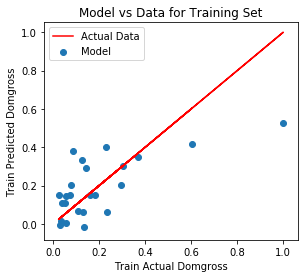

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
# your code here

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(y_train, y_train, color = "red", label='Actual Data')
plt.scatter(y_train, y_hat_train, label='Model')
plt.xlabel("Train Actual Domgross")
plt.ylabel("Train Predicted Domgross")
plt.legend()
plt.title('Model vs Data for Training Set')

# Not really on target, but there is a bit of a cluster. I'll guess this has high bias, and
# medium variance.

# According to my calculations below, it has low bias and low variance

## Plot the test predictions against the actual data (y_hat_test vs. y_test)

Do the same thing for the test data.

Text(0.5, 1.0, 'Model vs Data for Testing Set')

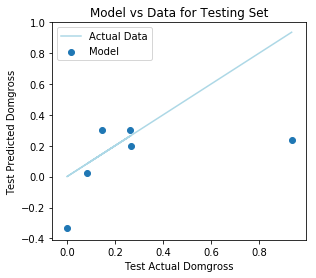

In [8]:
# your code here
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(y_test, y_test, color = "lightblue", label='Actual Data')
plt.scatter(y_test, y_hat_test, label='Model')
plt.xlabel("Test Actual Domgross")
plt.ylabel("Test Predicted Domgross")
plt.legend()
plt.title('Model vs Data for Testing Set')

# This model has underfit the testing data

## Calculate the bias
Write a formula to calculate the bias of a models predictions given the actual data: $Bias(\hat{f}(x)) = E[\hat{f}(x)-f(x)]$   
(The expected value can simply be taken as the mean or average value.)  


In [9]:
import numpy as np
def bias(y, y_hat):
    return np.mean(y_hat - y)

## Calculate the variance
Write a formula to calculate the variance of a model's predictions: $Var(\hat{f}(x)) = E[\hat{f}(x)^2] - \big(E[\hat{f}(x)]\big)^2$

In [10]:
def variance(y_hat):
    return np.mean(y_hat**2) - np.mean(y_hat)**2

## Use your functions to calculate the bias and variance of your model. Do this seperately for the train and test sets.

In [11]:
# code for train set bias and variance
train_bias = bias(y_train, y_hat_train)
train_var = variance(y_hat_train)
print(train_bias, train_var)

1.133352670971514e-16 0.02208165652573968


In [12]:
# code for test set bias and variance
test_bias = bias(y_test, y_hat_test)
test_var = variance(y_hat_test)
print(test_bias, test_var)

-0.1624441051157137 0.04957775258226284


## Describe in words what these numbers can tell you.

Your description here (this cell is formatted using markdown)

My model for training set has low bias, but low variance.
My model for the test set has low bias and low  variance.

## Overfit a new model by creating additional features by raising current features to various powers.

Use `PolynomialFeatures` with degree 3. 

**Important note:** By including this, you don't only take polynomials of single variables, but you also combine variables, eg:

$ \text{Budget} * \text{MetaScore} ^ 2 $

What you're essentially doing is taking interactions and creating polynomials at the same time! Have a look at how many columns we get using `np.shape`. Quite a few!


## Plot your overfitted model's training predictions against the actual data

Text(0.5, 0, 'Domgross Actual')

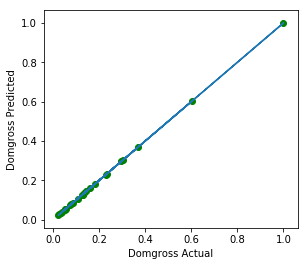

In [19]:
# your code here
from sklearn.preprocessing import PolynomialFeatures
# your code here
poly = PolynomialFeatures(3)
X_fin = poly.fit_transform(X_train)
poly_reg = LinearRegression().fit(X_fin, y_train)

y_poly_pred = poly_reg.predict(X_fin)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_poly_pred, color = "green")
plt.plot(y_poly_pred, y_poly_pred)
plt.ylabel("Domgross Predicted")
plt.xlabel("Domgross Actual")


Wow, we almost get a perfect fit!

## Calculate the bias and variance for the train set

In [18]:
# your code here
print(bias(y_train, y_poly_pred))
print(variance(y_poly_pred))

-1.313185671314443e-15
0.04580414489017853


## Plot your overfitted model's test predictions against the actual data.

Text(0.5, 0, 'Domgross Actual')

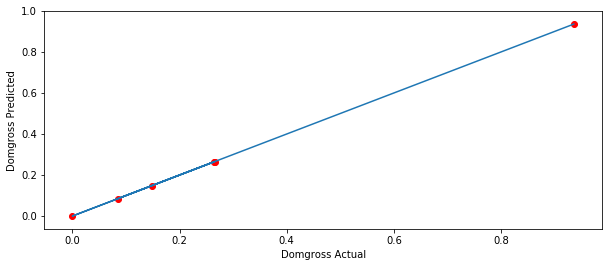

In [22]:
# your code here
X_fin_test = poly.fit_transform(X_test)
poly_reg_test = LinearRegression().fit(X_fin_test, y_test)
y_poly_pred_test = poly_reg.predict(X_fin_test)

plt.figure(figsize=(10, 4))
plt.scatter(y_test, y_poly_pred_test, color = "red")
plt.plot(y_poly_pred_test, y_poly_pred_test)
plt.ylabel("Domgross Predicted")
plt.xlabel("Domgross Actual")

##  Calculate the bias and variance for the test set.

In [ ]:
# your code here


## Describe what you notice about the bias and variance statistics for your overfit model

The bias and variance for the test set both increased drastically in the overfit model.

## Level Up - Optional

In this lab we went from 4 predictors to 35 by adding polynomials and interactions, using `PolynomialFeatures`. That being said, where 35 leads to overfitting, there are probably ways to improve by just adding a few polynomials. Feel free to experiment and see how bias and variance improve!

## Summary

This lab gave you insight in how bias and variance change for a training and test set by using a pretty "simple" model, and a very complex model. 